In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


data= pd.read_csv('database.csv')
data.info()

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [12]:
data


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


In [13]:
data.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [14]:
data=data.dropna()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


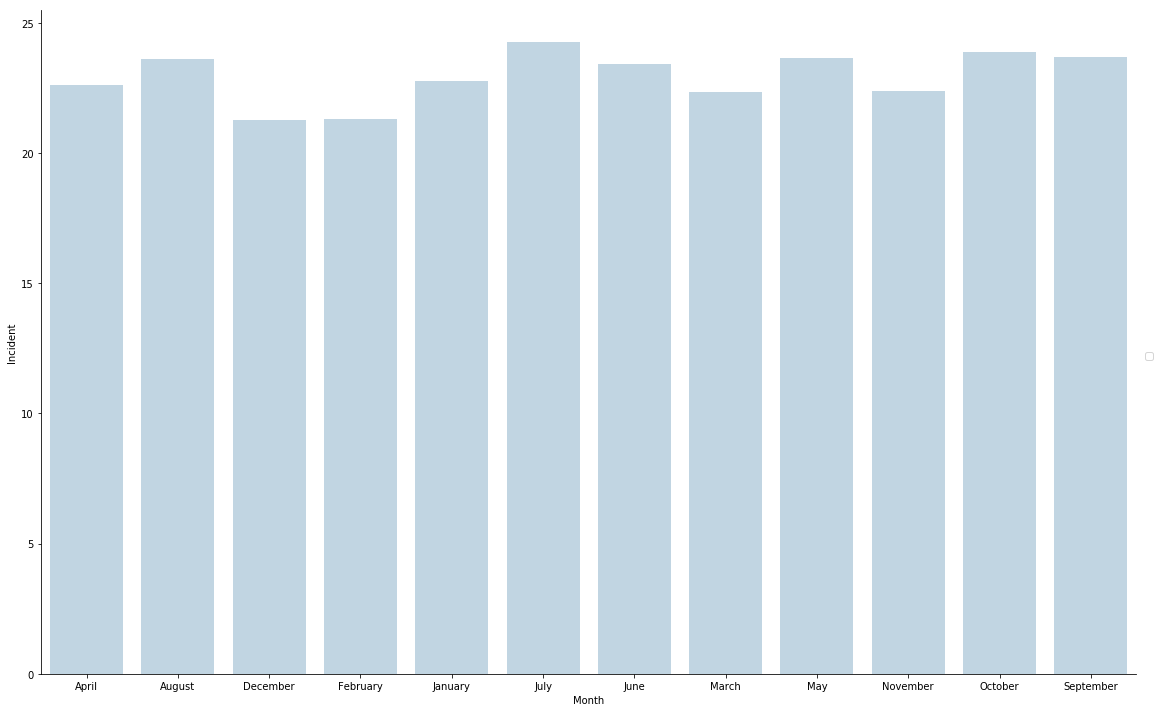

In [5]:

grid= sns.FacetGrid(data[['Month', 'Incident']]. groupby(['Month'], as_index=False).mean(),size=10,aspect=1.6)
grid.map(sns.barplot,'Month','Incident',alpha=.3)
grid.add_legend()
plt.savefig('purchase_fre_job')

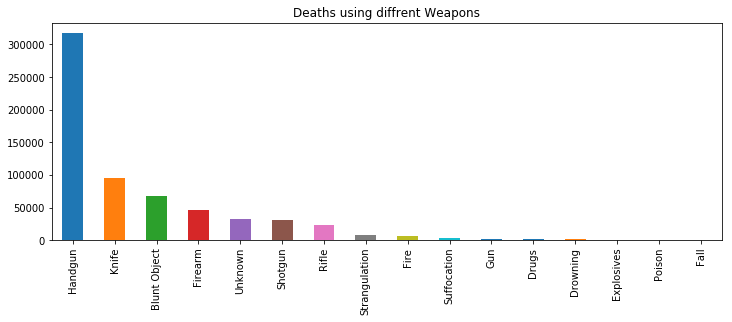

In [7]:
plt.rcParams["figure.figsize"] = (12,4)
data["Weapon"].value_counts().plot(kind = "bar")
plt.title('Deaths using diffrent Weapons')
plt.savefig('purchase_fre_job')

In [15]:
new = data[data['Perpetrator Sex'] != 'Unknown']

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


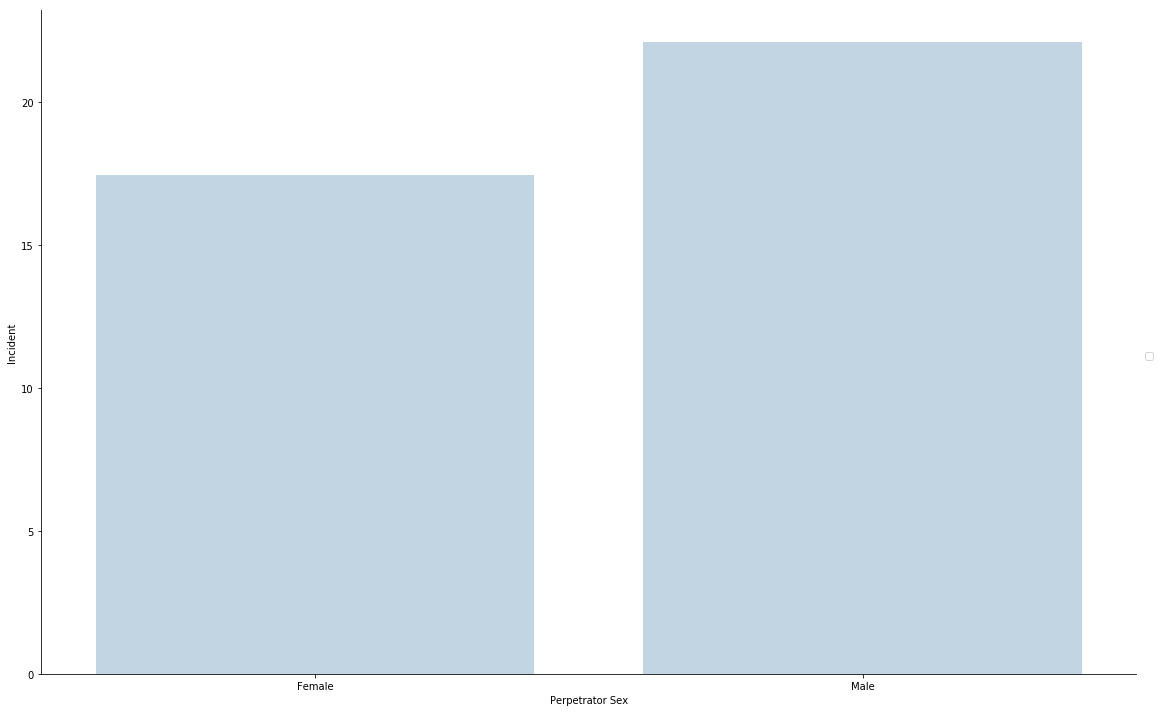

In [9]:
grid= sns.FacetGrid(new[['Perpetrator Sex', 'Incident']]. groupby(['Perpetrator Sex'], as_index=False).mean(),size=10,aspect=1.6)
grid.map(sns.barplot,'Perpetrator Sex','Incident',alpha=.3)
grid.add_legend()
plt.savefig('purchase_fre_job')

In [10]:
new2 = data[data['Victim Sex'] != 'Unknown']

In [12]:
df=data[data['Perpetrator Race']!='Unknown']

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


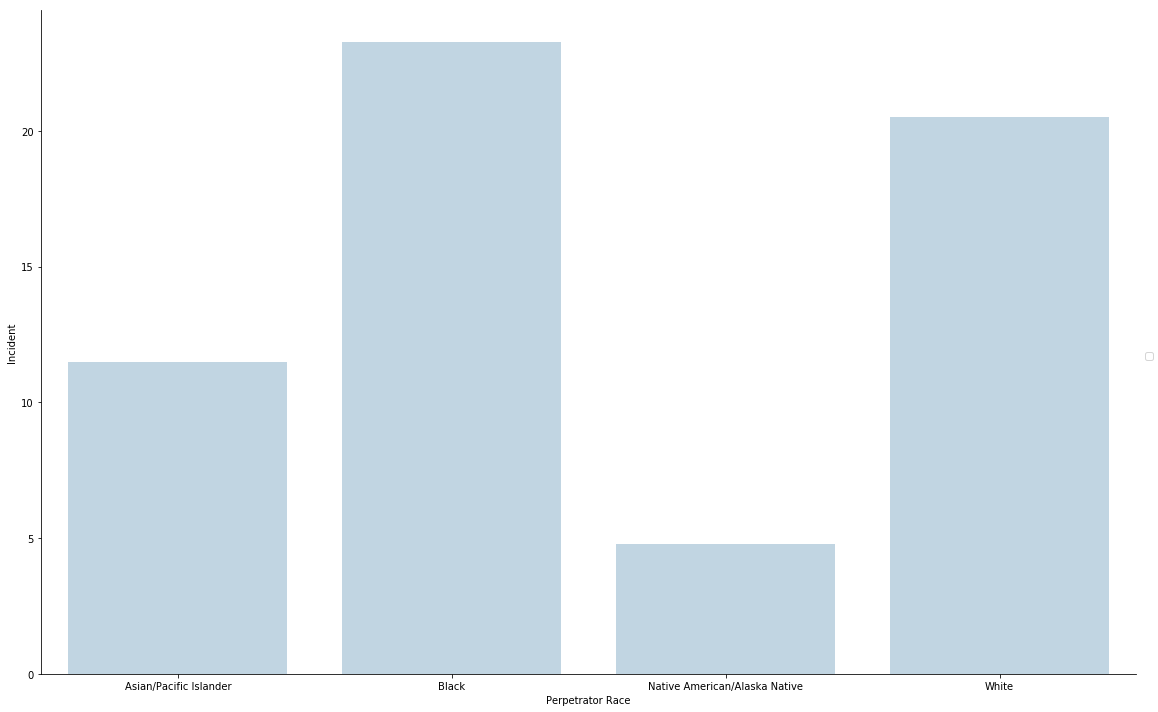

In [13]:
grid= sns.FacetGrid(df[['Perpetrator Race', 'Incident']]. groupby(['Perpetrator Race'], as_index=False).mean(),size=10,aspect=1.6)
grid.map(sns.barplot,'Perpetrator Race','Incident',alpha=.3)
grid.add_legend()
plt.savefig('purchase_fre_job')

AxesSubplot(0.125,0.125;0.775x0.755)


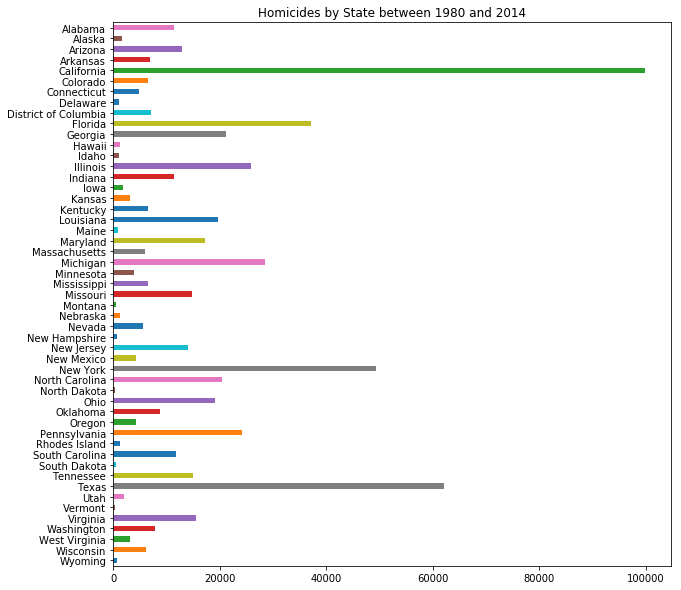

In [14]:
state = pd.DataFrame(data, columns = ['State']) 
count_states = state.stack().value_counts()
states = count_states.sort_index(axis=0, ascending=False)a
#plot the total of homicides
print(states.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(10, 10), title='Homicides by State between 1980 and 2014'))

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


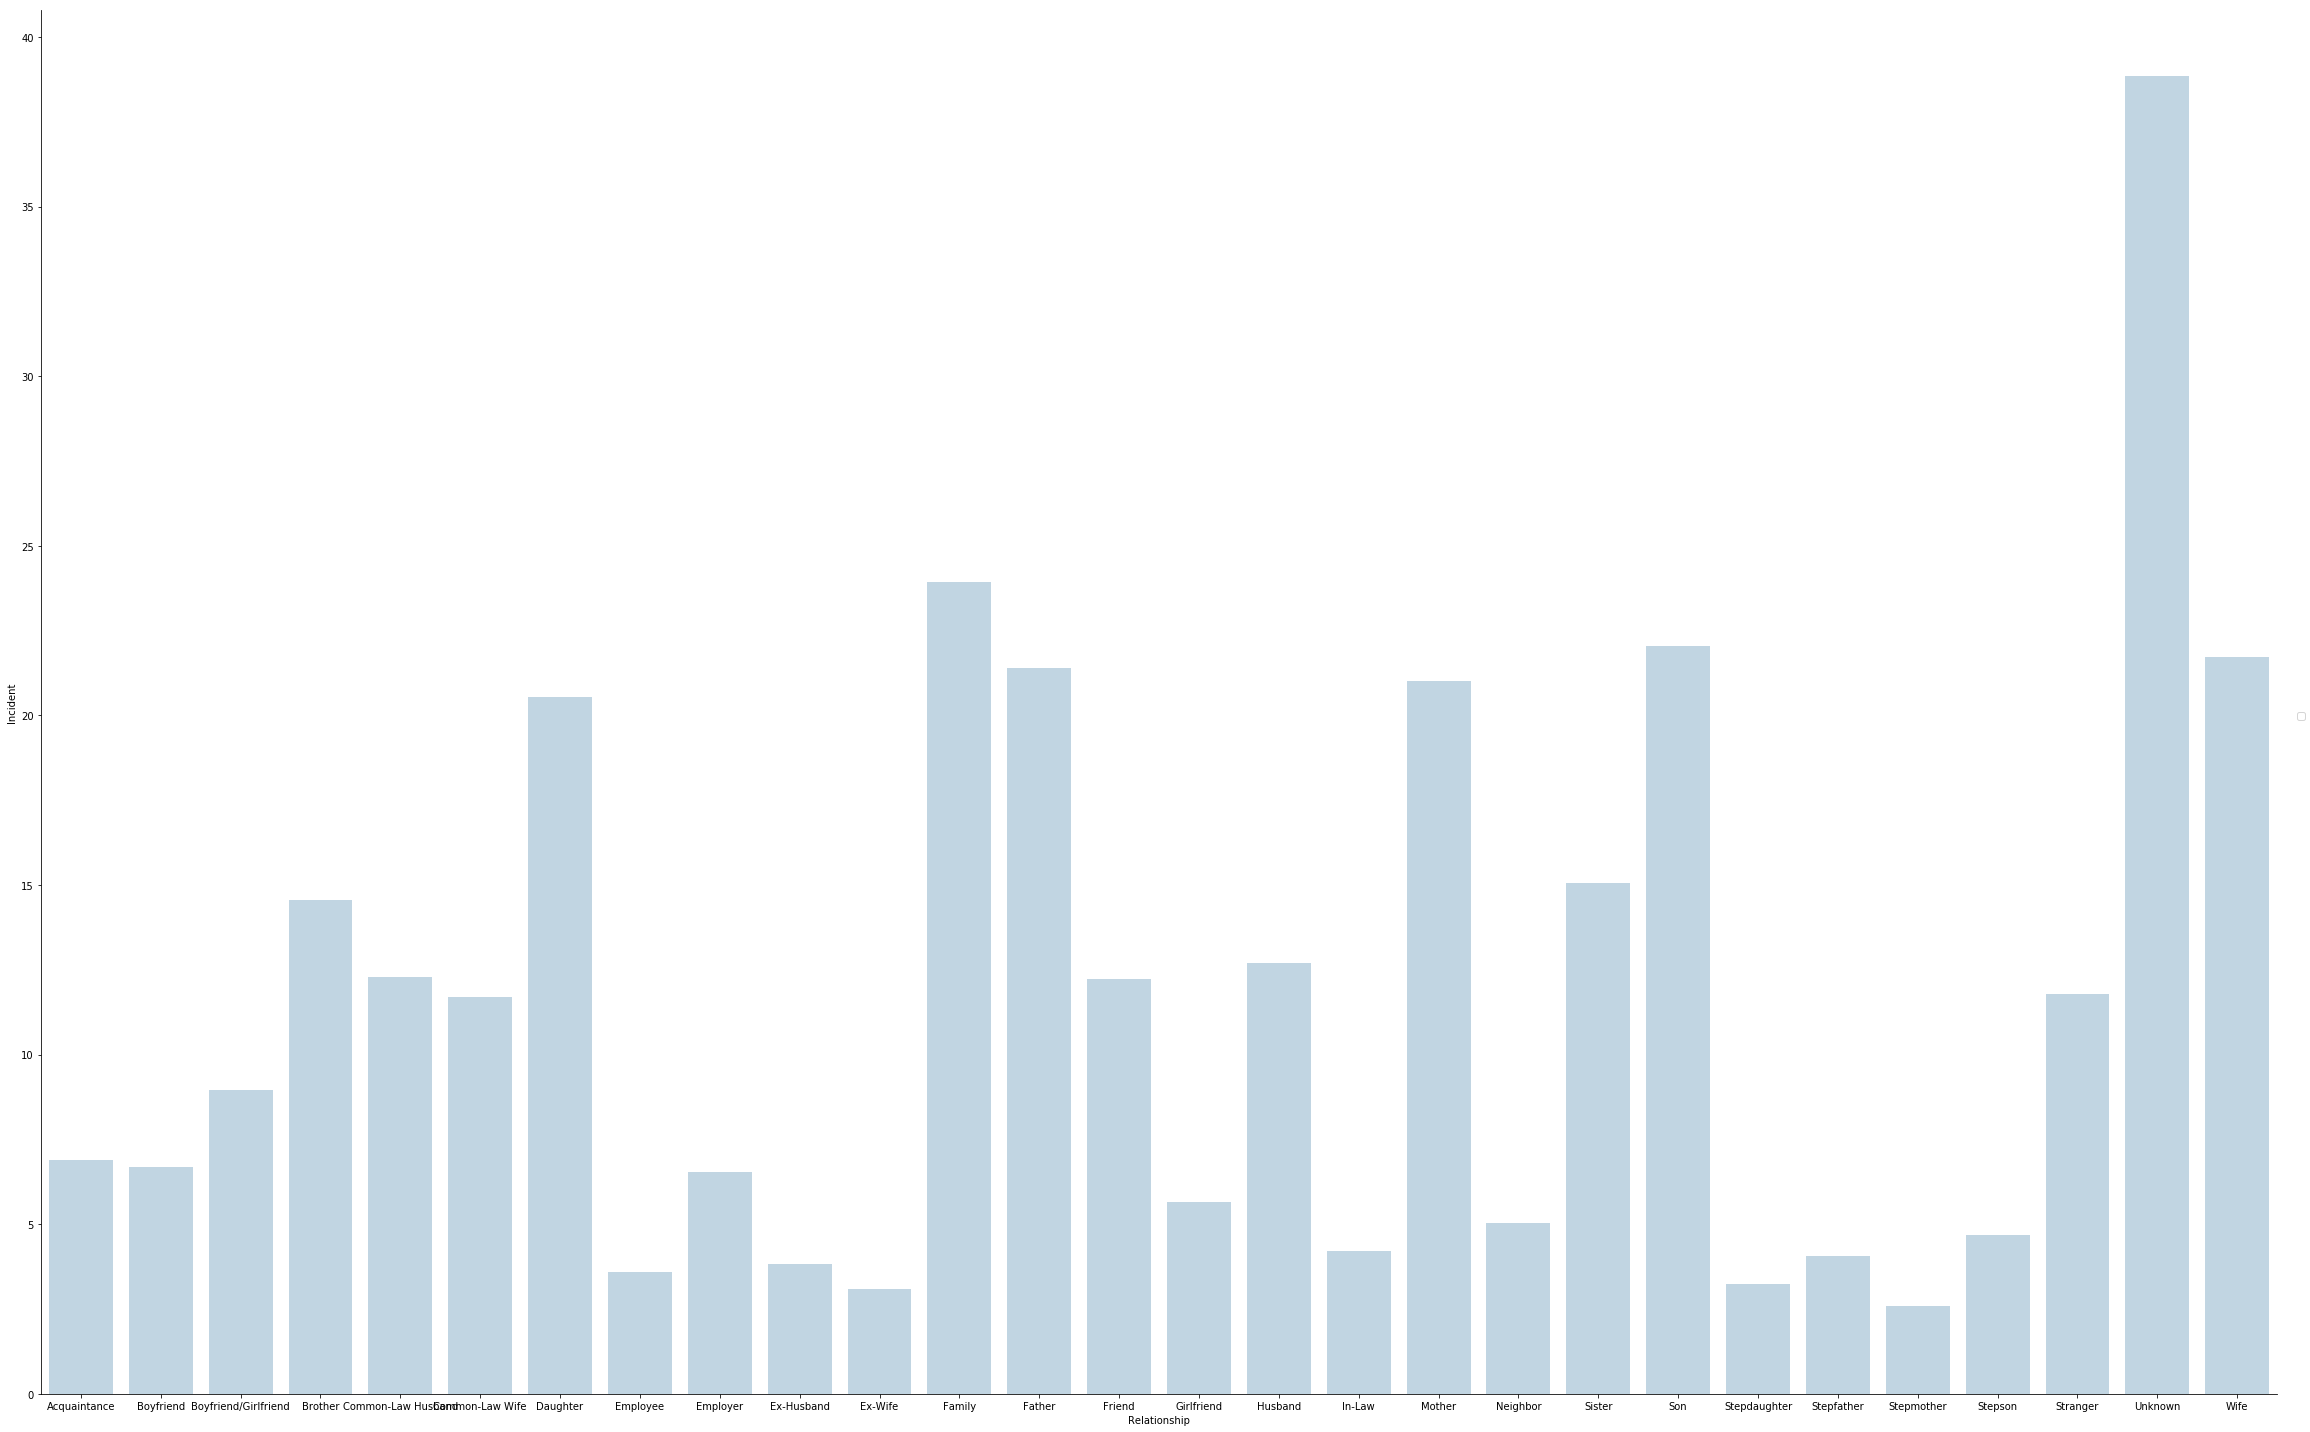

In [15]:
grid= sns.FacetGrid(data[['Relationship', 'Incident']]. groupby(['Relationship'], as_index=False).mean(),size=20,aspect=1.6)
grid.map(sns.barplot,'Relationship','Incident',alpha=.3)
grid.add_legend()
plt.savefig('purchase_fre_job')

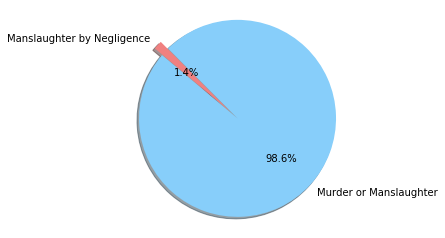

In [100]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Murder or Manslaughter', 'Manslaughter by Negligence'
sizes = [629338, 9116]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [16]:
unsolved_Crimes =data[data['Crime Solved'] == 'No']
unsolved_Crimes

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
10,11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
14,15,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
26,27,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,February,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
32,33,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
33,34,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
34,35,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,3,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
38,39,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,October,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI


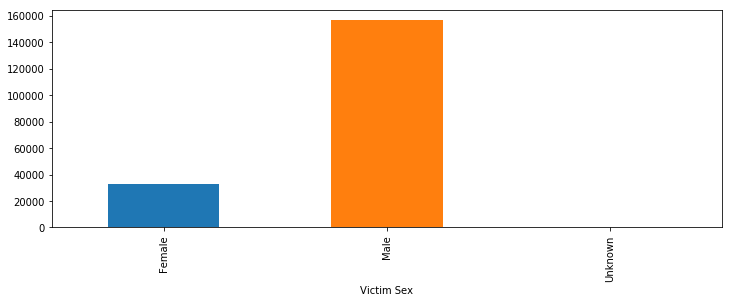

In [17]:
rel = unsolved_Crimes['Weapon'].groupby(unsolved_Crimes['Victim Sex'])
rel.size().plot(kind='bar')

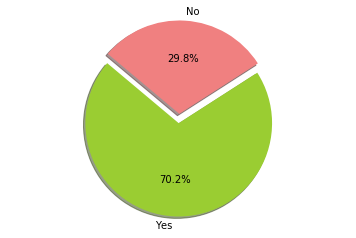

In [99]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Yes', 'No'
sizes = [448172, 190282]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [16]:
data = data.drop(['Record ID','Agency Code','Agency Name','Month','Record Source','Victim Ethnicity'] , axis = 1)
data = data[data['Victim Age'] < 100 ]
data = data[data['Perpetrator Age'] != 0]
data

,Agency Type,City,State,Year,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
3,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
5,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Unknown,Acquaintance,Rifle,0,0
6,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Unknown,Wife,Knife,0,0
7,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Female,99,White,Male,35,White,Unknown,Wife,Knife,0,0
9,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,Male,38,White,Male,40,Unknown,Unknown,Unknown,Firearm,0,1
11,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,Male,20,White,Male,49,White,Unknown,Stranger,Shotgun,0,0
12,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,Female,36,Black,Male,39,Black,Unknown,Girlfriend,Blunt Object,0,0
13,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,20,Native American/Alaska Native,Male,49,White,Unknown,Unknown,Fall,0,0


In [19]:
data

,Agency Type,City,State,Year,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
3,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
5,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Unknown,Acquaintance,Rifle,0,0
6,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Unknown,Wife,Knife,0,0
7,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Female,99,White,Male,35,White,Unknown,Wife,Knife,0,0
9,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,Male,38,White,Male,40,Unknown,Unknown,Unknown,Firearm,0,1
11,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,Male,20,White,Male,49,White,Unknown,Stranger,Shotgun,0,0
12,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,Female,36,Black,Male,39,Black,Unknown,Girlfriend,Blunt Object,0,0
13,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,Male,20,Native American/Alaska Native,Male,49,White,Unknown,Unknown,Fall,0,0


In [17]:
diction1 = {'Male': 1 , 'Female':2 , 'Unknown' : 0}
diction2= {'Unknown' :0 , 'White': 1 , 'Black' :2 , 'Native American/Alaska Native': 3,'Asian/Pacific Islander':4 }
data['Perpetrator Sex']=data['Perpetrator Sex'].map(diction1)
data['Victim Sex']=data['Victim Sex'].map(diction1)
data

,Agency Type,City,State,Year,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,14,Native American/Alaska Native,1,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,43,White,1,42,White,Unknown,Acquaintance,Strangulation,0,0
3,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,43,White,1,42,White,Unknown,Acquaintance,Strangulation,0,0
5,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,30,White,1,36,White,Unknown,Acquaintance,Rifle,0,0
6,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,2,42,Native American/Alaska Native,1,27,Black,Unknown,Wife,Knife,0,0
7,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,2,99,White,1,35,White,Unknown,Wife,Knife,0,0
9,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,1,38,White,1,40,Unknown,Unknown,Unknown,Firearm,0,1
11,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,1,20,White,1,49,White,Unknown,Stranger,Shotgun,0,0
12,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,2,36,Black,1,39,Black,Unknown,Girlfriend,Blunt Object,0,0
13,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,20,Native American/Alaska Native,1,49,White,Unknown,Unknown,Fall,0,0


In [18]:
data['Victim Race']=data['Victim Race'].map(diction2)
data['Perpetrator Race']=data['Perpetrator Race'].map(diction2)
data

,Agency Type,City,State,Year,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,14,3,1,15,3,Unknown,Acquaintance,Blunt Object,0,0
1,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,43,1,1,42,1,Unknown,Acquaintance,Strangulation,0,0
3,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,43,1,1,42,1,Unknown,Acquaintance,Strangulation,0,0
5,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,30,1,1,36,1,Unknown,Acquaintance,Rifle,0,0
6,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,2,42,3,1,27,2,Unknown,Wife,Knife,0,0
7,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,2,99,1,1,35,1,Unknown,Wife,Knife,0,0
9,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,1,38,1,1,40,0,Unknown,Unknown,Firearm,0,1
11,Municipal Police,Anchorage,Alaska,1980,2,Murder or Manslaughter,Yes,1,20,1,1,49,1,Unknown,Stranger,Shotgun,0,0
12,Municipal Police,Anchorage,Alaska,1980,3,Murder or Manslaughter,Yes,2,36,2,1,39,2,Unknown,Girlfriend,Blunt Object,0,0
13,Municipal Police,Anchorage,Alaska,1980,1,Murder or Manslaughter,Yes,1,20,3,1,49,1,Unknown,Unknown,Fall,0,0


In [19]:
inputdata=data[['Victim Sex','Victim Age','Victim Race']].copy()
#inputdata= inputdata.dropna()
inputdata

,Victim Sex,Victim Age,Victim Race
0,1,14,3
1,1,43,1
3,1,43,1
5,1,30,1
6,2,42,3
7,2,99,1
9,1,38,1
11,1,20,1
12,2,36,2
13,1,20,3


In [20]:
outputdata = data[['Perpetrator Sex','Perpetrator Age','Perpetrator Race']].copy()
#outputdata = outputdata.dropna()
outputdata['Perpetrator Age']=pd.to_numeric(outputdata['Perpetrator Age'], errors='coerce')
outputdata=outputdata.astype(float)
inputdata= inputdata.astype(float)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(inputdata, outputdata, random_state=13)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
pred=pd.DataFrame({'Perpetrator Sex':y_pred[:,0],'Perpetrator Age':y_pred[:,1],'Perpetrator Race':y_pred[:,2]})
from sklearn.metrics import accuracy_score
print((accuracy_score(pred['Perpetrator Race'],y_test['Perpetrator Race'])+accuracy_score(pred['Perpetrator Sex'],y_test['Perpetrator Sex']))/2)


0.865385155833


In [23]:
pred

,Perpetrator Sex,Perpetrator Age,Perpetrator Race
0,1.0,24.0,2.0
1,1.0,18.0,2.0
2,1.0,19.0,2.0
3,1.0,23.0,1.0
4,1.0,44.0,1.0
5,1.0,43.0,1.0
6,1.0,27.0,1.0
7,1.0,42.0,1.0
8,1.0,18.0,2.0
9,1.0,17.0,1.0


In [24]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [25]:
y_pred1 = clf.predict(X_test)
pred1=pd.DataFrame({'Perpetrator Sex':y_pred1[:,0],'Perpetrator Age':y_pred1[:,1],'Perpetrator Race':y_pred1[:,2]})
pred1

,Perpetrator Sex,Perpetrator Age,Perpetrator Race
0,1.0,20.0,2.0
1,1.0,20.0,2.0
2,1.0,20.0,2.0
3,1.0,20.0,1.0
4,1.0,20.0,1.0
5,1.0,20.0,1.0
6,1.0,20.0,1.0
7,1.0,20.0,1.0
8,1.0,20.0,2.0
9,1.0,20.0,1.0


In [26]:
(accuracy_score(pred1['Perpetrator Race'],y_test['Perpetrator Race'])+accuracy_score(pred1['Perpetrator Sex'],y_test['Perpetrator Sex']))/2

0.86642966210456307

In [ ]:
data[['Victim Sex','Crime Type']].groupby('Victim Sex').sum()

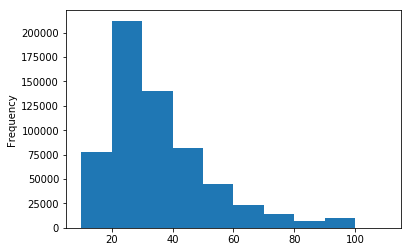

In [8]:
data['Victim Age'].plot.hist(bins=[10,20,30,40,50,60,70,80,90,100,110])

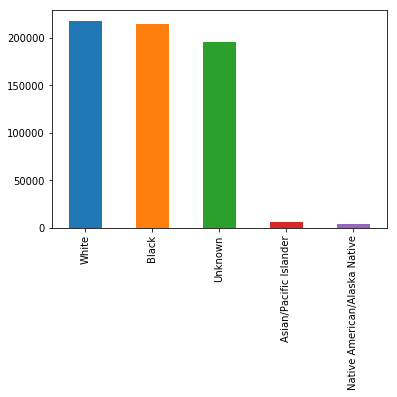

In [9]:
data['Perpetrator Race'].value_counts().plot.bar()